In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/data_ANN_LSTM/population_render.csv'
data = pd.read_csv(path)
data["Year"] = pd.to_datetime(data["Year"])
index_data = data.set_index(["Year"], drop=True)

# Check data
index_data.head()

,Population
Year,
2005-12-31,83.832661
2006-12-31,84.617540
2007-12-31,85.419591
2008-12-31,86.243413
2009-12-31,87.092252


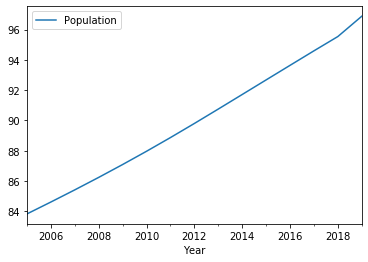

In [3]:
df = index_data[["Population"]]
df.plot()

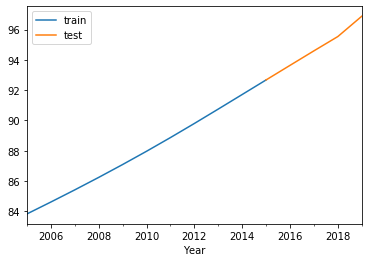

In [4]:
# Split data
split_date = pd.Timestamp('2015-12-31')

train = df.loc[:split_date]
test = df.loc[split_date:]

# Plot splitted data
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [5]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
train_scale = scale.fit_transform(train)
test_scale = scale.transform(test)

In [6]:
# Long Short-term Memory

# Split data into x (train,test) and y (train,test)
X_train = train_scale[:-1]
y_train = train_scale[1:]

X_test = test_scale[:-1]
y_test = test_scale[1:]

In [7]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM

K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(7, input_shape = (1, X_train.shape[1]), activation = 'relu', kernel_initializer= 'lecun_uniform', return_sequences = False))
model_lstm.add(Dense(1))
model_lstm.compile(loss = 'mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'loss', patience = 5, verbose = 1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs = 425, batch_size = 1, verbose = 1, shuffle = False, callbacks = [early_stop])

Using TensorFlow backend.


Epoch 1/425
10/10 [==============================] - 0s 34ms/step - loss: 0.2879
Epoch 2/425
10/10 [==============================] - 0s 2ms/step - loss: 0.2751
Epoch 3/425
10/10 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 4/425
10/10 [==============================] - 0s 2ms/step - loss: 0.2504
Epoch 5/425
10/10 [==============================] - 0s 2ms/step - loss: 0.2385
Epoch 6/425
10/10 [==============================] - 0s 2ms/step - loss: 0.2270
Epoch 7/425
10/10 [==============================] - 0s 2ms/step - loss: 0.2158
Epoch 8/425
10/10 [==============================] - 0s 2ms/step - loss: 0.2050
Epoch 9/425
10/10 [==============================] - 0s 2ms/step - loss: 0.1944
Epoch 10/425
10/10 [==============================] - 0s 1ms/step - loss: 0.1842
Epoch 11/425
10/10 [==============================] - 0s 1ms/step - loss: 0.1743
Epoch 12/425
10/10 [==============================] - 0s 1ms/step - loss: 0.1647
Epoch 13/425
10/10 [================

10/10 [==============================] - 0s 1ms/step - loss: 1.0753e-04
Epoch 200/425
10/10 [==============================] - 0s 1ms/step - loss: 1.0312e-04
Epoch 201/425
10/10 [==============================] - 0s 1ms/step - loss: 9.8984e-05
Epoch 202/425
10/10 [==============================] - 0s 1ms/step - loss: 9.5113e-05
Epoch 203/425
10/10 [==============================] - 0s 1ms/step - loss: 9.1489e-05
Epoch 204/425
10/10 [==============================] - 0s 1ms/step - loss: 8.8100e-05
Epoch 205/425
10/10 [==============================] - 0s 1ms/step - loss: 8.4931e-05
Epoch 206/425
10/10 [==============================] - 0s 1ms/step - loss: 8.1968e-05
Epoch 207/425
10/10 [==============================] - 0s 1ms/step - loss: 7.9200e-05
Epoch 208/425
10/10 [==============================] - 0s 995us/step - loss: 7.6615e-05
Epoch 209/425
10/10 [==============================] - 0s 1ms/step - loss: 7.4202e-05
Epoch 210/425
10/10 [==============================] - 0s 1ms/step

10/10 [==============================] - 0s 1ms/step - loss: 2.6315e-05
Epoch 390/425
10/10 [==============================] - 0s 1ms/step - loss: 2.6190e-05
Epoch 391/425
10/10 [==============================] - 0s 1ms/step - loss: 2.6065e-05
Epoch 392/425
10/10 [==============================] - 0s 1ms/step - loss: 2.5939e-05
Epoch 393/425
10/10 [==============================] - 0s 1ms/step - loss: 2.5814e-05
Epoch 394/425
10/10 [==============================] - 0s 1ms/step - loss: 2.5689e-05
Epoch 395/425
10/10 [==============================] - 0s 1ms/step - loss: 2.5563e-05
Epoch 396/425
10/10 [==============================] - 0s 1ms/step - loss: 2.5438e-05
Epoch 397/425
10/10 [==============================] - 0s 1ms/step - loss: 2.5312e-05
Epoch 398/425
10/10 [==============================] - 0s 1ms/step - loss: 2.5187e-05
Epoch 399/425
10/10 [==============================] - 0s 1ms/step - loss: 2.5061e-05
Epoch 400/425
10/10 [==============================] - 0s 1ms/step -

In [9]:
# Prediction
y_pred_test_lstm = model_lstm.predict(X_tst_t)
y_train_pred_lstm = model_lstm.predict(X_tr_t)

In [10]:
model_lstm.save('LSTM_population.h5')

In [15]:
model_lstm = load_model('LSTM_population.h5')
y_pred_test_LSTM = model_lstm.predict(X_tst_t)

In [17]:
# R2 score
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

# MAPE
def MAPE(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return (np.mean(np.abs((y - y_pred) / y)) * 100) 

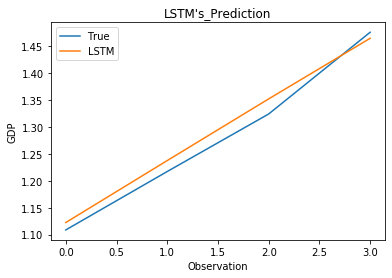

4/4 [==============================] - 0s 723us/step
LSTM: 0.000377
The R2 score on the Train set is:	0.999760063
The Adjusted R2 score on the Train set is:	0.999730071

The R2 score on the Test set is:	0.979440055
The Adjusted R2 score on the Test set is:	0.969160082
MAPE score is: 1.4440693070591808


In [20]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Graphing
plt.plot(y_test, label='True')
plt.plot(y_pred_test_LSTM, label='LSTM')
plt.title("LSTM Prediction")
plt.xlabel('Observation')
plt.ylabel('GDP')
plt.legend()
plt.show()

# Scoring
score_lstm= model_lstm.evaluate(X_tst_t, y_test, batch_size=1)
print('LSTM: %f'%score_lstm)

# R2 Scores
print("The R2 score on the Train set is:\t{:0.9f}".format(r2_score(y_train, y_train_pred_lstm)))
r2_train = r2_score(y_train, y_train_pred_lstm)
print("The Adjusted R2 score on the Train set is:\t{:0.9f}\n".format(adj_r2_score(r2_train, X_train.shape[0], X_train.shape[1])))
print("The R2 score on the Test set is:\t{:0.9f}".format(r2_score(y_test, y_pred_test_lstm)))
r2_test = r2_score(y_test, y_pred_test_lstm)
print("The Adjusted R2 score on the Test set is:\t{:0.9f}".format(adj_r2_score(r2_test, X_test.shape[0], X_test.shape[1])))

# MAPE Score
print("MAPE score is: " + str(MAPE(y_test, y_pred_test_LSTM)))